In [162]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
os.getcwd()
os.chdir(os.getcwd())


Read 4 json files and transform them into DataFrames, then concat into 1 final DataFrame (df)

In [164]:
df_part_1 = pd.read_json("Spotify Extended Streaming History/Streaming_History_Audio_2020-2023_0.json")
df_part_2 = pd.read_json("Spotify Extended Streaming History/Streaming_History_Audio_2023_1.json")
df_part_3 = pd.read_json("Spotify Extended Streaming History/Streaming_History_Audio_2023-2024_2.json")
# df_part_4 = pd.read_json("Spotify Extended Streaming History\Streaming_History_Video_2020-2024.json")

In [165]:
# Concat all given DataFrames into 1 DF for further analyses
spotify_df = pd.concat([df_part_1, df_part_2, df_part_3])
# Removing username column because I am the only one using this account
spotify_df.drop(columns=['username'], inplace=True)

In [166]:
spotify_df.head()

,ts,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-08-22T16:34:56Z,Windows 10 (10.0.18363; x64; AppX),238360,VN,171.241.150.149,unknown,unravel,TK from Ling tosite sigure,Fantastic Magic,spotify:track:0GLyqTysS0DFoeKjURtB8s,None,None,None,clickrow,trackdone,False,NaN,False,1598113859206,False
1,2020-08-22T16:40:32Z,Windows 10 (10.0.18363; x64; AppX),9490,VN,171.241.150.149,unknown,katharsis,TK from Ling tosite sigure,Katharsis,spotify:track:0PnrdoLqdpScsUTYd06Zb8,None,None,None,trackdone,logout,False,NaN,False,1598114096805,False
2,2020-08-22T16:40:42Z,Windows 10 (10.0.18363; x64; AppX),2500,VN,171.241.150.149,unknown,Dancing With A Stranger (with Normani),Sam Smith,Dancing With A Stranger (with Normani),spotify:track:6Qs4SXO9dwPj5GKvVOv8Ki,None,None,None,clickrow,endplay,False,NaN,False,1598114439494,False
3,2020-08-22T16:40:45Z,Windows 10 (10.0.18363; x64; AppX),3100,VN,171.241.150.149,unknown,How Do You Sleep?,Sam Smith,How Do You Sleep?,spotify:track:6b2RcmUt1g9N9mQ3CbjX2Y,None,None,None,clickrow,endplay,False,NaN,False,1598114442297,False
4,2020-08-22T16:40:52Z,Windows 10 (10.0.18363; x64; AppX),6580,VN,171.241.150.149,unknown,Too Good At Goodbyes,Sam Smith,The Thrill Of It All,spotify:track:1mXVgsBdtIVeCLJnSnmtdV,None,None,None,clickrow,endplay,False,NaN,False,1598114445537,False


In [167]:
music_df = spotify_df.drop(columns=['episode_name', 'episode_show_name', 'spotify_episode_uri'],inplace=False)
# Using the Music DF to only concern about music listened during my usage of Spotify from 2020 upto now

### Descriptive statistics of listening habit

In [168]:
print("Total tracks listened:", len(music_df))
print("Number of artists listened to:", music_df['master_metadata_album_artist_name'].nunique())
print("Number of unique songs listened to:", music_df['master_metadata_track_name'].nunique())

Total tracks listened: 41162
Number of artists listened to: 2876
Number of unique songs listened to: 7531


In [28]:
top_10_artist = music_df['master_metadata_album_artist_name'].value_counts().head(10)
# top_10_artist = pd.DataFrame(top_10_artist)
print("Top 10 artists of choice:", top_10_artist)

Top 10 artists of choice: master_metadata_album_artist_name
Metro Boomin            985
Post Malone             929
The Weeknd              918
Arctic Monkeys          917
RPT MCK                 671
Aries                   634
Lý Bực                  631
Taylor Swift            623
Bring Me The Horizon    569
Linkin Park             509
Name: count, dtype: int64


Clean the data before conducting graphs

In [ ]:
# top_10 = music_df[music_df['master_metadata_album_artist_name'].isin(top_10_artist.index)]
music_df['datetime'] = pd.to_datetime(music_df['ts'])
music_df['hours_played'] = music_df['ms_played']/(3_600_000)
music_df.drop(labels=['ts','ms_played', 'conn_country'],axis=1, inplace=True)
music_df.head(10)

Listening data of 2023 - Top 10 artists by listening time: Who are my favorite artists on this platform?

Text(0.5, 1.0, 'Top 10 artists by listening time')

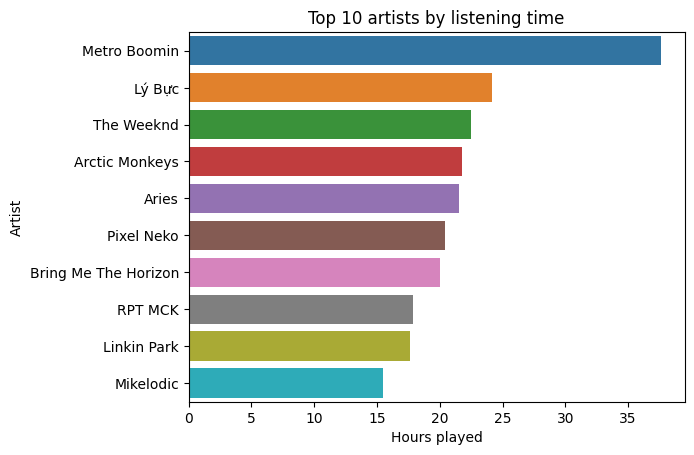

In [203]:
music_df_2023 = music_df[music_df['datetime'].apply(lambda t:t.year == 2023)]
music_df_2023 = music_df_2023.groupby('master_metadata_album_artist_name')['hours_played'].sum()
music_df_2023 = music_df_2023.sort_values(ascending=False).head(10)
music_df_2023 = music_df_2023.reset_index()
music_df_2023

sns.barplot(
    data=music_df_2023,
    x=music_df_2023.hours_played,
    y=music_df_2023.master_metadata_album_artist_name,
    orient='h'
)
plt.xlabel('Hours played')
plt.ylabel('Artist')
plt.title('Top 10 artists by listening time in 2023')



## Question 1: With the data from 2020 to 2023, I would like to find out top 10 artists I listened to during each year (similar to a Spotify Wrapped)

In [36]:
def top_10_listening_time(year):
    music_df_plot = music_df[music_df['datetime'].apply(lambda t:t.year == year)]
    music_df_plot = music_df_plot.groupby('master_metadata_album_artist_name')['hours_played'].sum()
    music_df_plot = music_df_plot.sort_values(ascending=False).head(10)
    music_df_plot = music_df_plot.reset_index()
    music_df_plot

    sns.barplot(
        data=music_df_plot,
        x=music_df_plot.hours_played,
        y=music_df_plot.master_metadata_album_artist_name,
        orient='h'
    )
    plt.xlabel('Hours played')
    plt.ylabel('Artist')
    plt.title('Top 10 artists by listening time in ' + str(year))



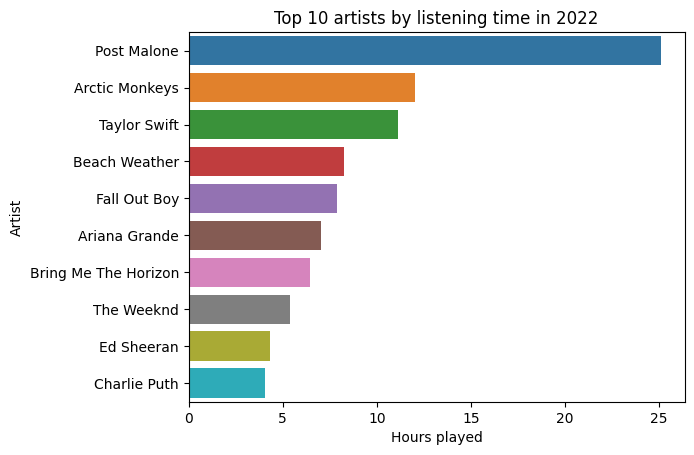

In [41]:
top_10_listening_time(2022)

# Question 2 - What were my favorite songs during those years?

In [66]:
music_df_truncated = music_df[['master_metadata_track_name', 'master_metadata_album_artist_name','master_metadata_album_album_name', 'hours_played', 'datetime']]
# Perform lambda function to group by year
def favorite_10_songs(year):
    music_df_truncated_by_year = music_df_truncated[music_df_truncated['datetime'].apply(lambda t:t.year == year)]
    music_df_truncated_by_year = music_df_truncated_by_year.groupby(by=['master_metadata_track_name','master_metadata_album_artist_name']).sum('hours_played')
    music_df_truncated_by_year = music_df_truncated_by_year.sort_values('hours_played',ascending=False)[:10]
    return music_df_truncated_by_year

In [ ]:
favorite_10_songs(2020)

# Question 3 - How much did I enjoy listening to an artist over time?

In [71]:
# Determine top artists listened to.
top_artists_df = music_df.groupby(['master_metadata_album_artist_name'])[['hours_played']]
top_artists_df = top_artists_df.sum().sort_values('hours_played', ascending=False)[:5]
top_artists = [artist for (artist) in top_artists_df.index.values]

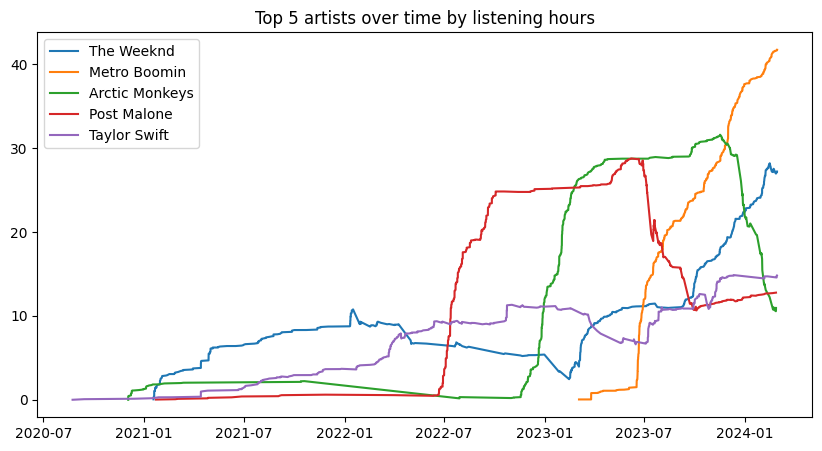

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
for artist in top_artists:
  # Generate rolling sums of total amount of time listening to the artist.
  favorite_artist_over_time = music_df.loc[music_df['master_metadata_album_artist_name'] == artist][['datetime', 'hours_played']]
#   df2['ts'] = df2['ts'].apply(pd.to_datetime)
  favorite_artist_over_time = favorite_artist_over_time.sort_values('datetime')
  favorite_artist_over_time = favorite_artist_over_time.rolling('365D', on='datetime').sum()
  ax.plot(favorite_artist_over_time['datetime'], favorite_artist_over_time['hours_played'], label=artist)

ax.set_title('Top 5 artists over time by listening hours')
plt.legend()
plt.show()